# テキストデータの可視化の練習

『三四郎』は、夏目漱石の前記三部作と呼ばれる作品群の一部です。

[『三四郎』](https://www.aozora.gr.jp/cards/000148/card794.html)（1909）・[『それから』](https://www.aozora.gr.jp/cards/000148/card1746.html)（1909）・[『門』](https://www.aozora.gr.jp/cards/000148/card785.html)（1910）の三部作を一つのコーパスとしてまとめて分析してみましょう。

『三四郎』だけの分析と比べると、どのような特徴が出てくるでしょうか？

## データの用意

In [1]:
# ファイルをダウンロードする
!wget https://www.aozora.gr.jp/cards/000148/files/794_ruby_4237.zip
!wget https://www.aozora.gr.jp/cards/000148/files/1746_ruby_18324.zip
!wget https://www.aozora.gr.jp/cards/000148/files/785_ruby_1656.zip
# textフォルダ作る
!mkdir -p text
# ファイルをtextフォルダに解凍
!unzip -d text -o 794_ruby_4237.zip
!unzip -d text -o 1746_ruby_18324.zip
!unzip -d text -o 785_ruby_1656.zip

--2024-12-09 12:21:33--  https://www.aozora.gr.jp/cards/000148/files/794_ruby_4237.zip
Resolving www.aozora.gr.jp (www.aozora.gr.jp)... 59.106.13.115
Connecting to www.aozora.gr.jp (www.aozora.gr.jp)|59.106.13.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158711 (155K) [application/zip]
Saving to: ‘794_ruby_4237.zip.2’

794_ruby_4237.zip.2 100%[===================>] 154.99K   131KB/s    in 1.2s    

2024-12-09 12:21:35 (131 KB/s) - ‘794_ruby_4237.zip.2’ saved [158711/158711]

--2024-12-09 12:21:35--  https://www.aozora.gr.jp/cards/000148/files/1746_ruby_18324.zip
Resolving www.aozora.gr.jp (www.aozora.gr.jp)... 59.106.13.115
Connecting to www.aozora.gr.jp (www.aozora.gr.jp)|59.106.13.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 202267 (198K) [application/zip]
Saving to: ‘1746_ruby_18324.zip.1’

1746_ruby_18324.zip 100%[===================>] 197.53K   558KB/s    in 0.4s    

2024-12-09 12:21:35 (558 KB/s) - ‘1746_ruby_1832

In [2]:
# 青空文庫の記法を削除する

import re

input_fn = "text/sanshiro.txt"
output_fn = "text/sanshiro.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [3]:
input_fn = "text/sorekara.txt"
output_fn = "text/sorekara.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [4]:
input_fn = "text/mon.txt"
output_fn = "text/mon.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [4]:
import sys

# 冒頭と末尾の説明を取り除く（何行取り除くかは目視で確認）

if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +22 text/sanshiro.stripruby.txt | ghead -n -14 > text/sanshiro.corpus.txt
else:
    !tail -n +22 text/sanshiro.stripruby.txt | head -n -14 > text/sanshiro.corpus.txt

In [6]:
if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +22 text/sorekara.stripruby.txt | ghead -n -14 > text/sorekara.corpus.txt
else:
    !tail -n +22 text/sorekara.stripruby.txt | head -n -14 > text/sorekara.corpus.txt

In [7]:
if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +18 text/mon.stripruby.txt | ghead -n -14 > text/mon.corpus.txt
else:
    !tail -n +18 text/mon.stripruby.txt | head -n -14 > text/mon.corpus.txt

In [8]:
# 3つのファイルを統合する

!cat text/sanshiro.corpus.txt text/sorekara.corpus.txt text/mon.corpus.txt > text/all.corpus.txt

これで、三作品をまとめて分析する準備ができました。

演習の内容を参考にして、ワードクラウド、共起ネットワーク、共起ヒートマップを作ってみましょう。

## ワードクラウド

In [60]:
# your code goes here
!pip install wordcloud
!pip install spacy ginza ja-ginza
!pip install scikit-learn pandas

In [9]:
import spacy

nlp = spacy.load("ja_ginza")

In [5]:
if sys.platform == "darwin":
    fpath = "/Library/Fonts/Arial Unicode.ttf"
else:
    fpath = "/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf"

In [10]:
input_fn = "text/all.corpus.txt"
output_fn = "text/all.wakati.txt"

nlp = spacy.load("ja_ginza")

with open(input_fn, "r") as fin, open(output_fn, "w") as fout:
    for line in fin:
        tokens = [token.text for token in nlp(line.rstrip())]
        fout.write(' '.join(tokens) + "\n")

In [11]:
all_tokens = []
with open(input_fn, "r") as f:
    for line in f:
        tokens = [token for token in nlp(line)]
        all_tokens.extend(tokens)

In [12]:
from collections import Counter

# 分析対象とする品詞（内容語 - 名詞、動詞、形容詞）と不要語（ストップワード）を指定する
include_pos = ("NOUN", "VERB", "ADJ")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん", "ゐる", "云ふ", "言う", "つ", "御", "事", "時", "あり", "つう", "云う", "方", "所", "思う")

# 単語の頻度を数える
counter = Counter(token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords)

# 出現頻度top 20を出力する
for word, count in counter.most_common(20):
    print(f"{count:>5} {word}")

 1172 来る
  944 見る
  782 自分
  779 出る
  680 聞く
  636 行く
  581 中
  572 人
  564 上
  535 米
  502 気
  472 女
  465 出す
  443 顔
  432 前
  399 帰る
  357 うち
  357 かつ
  355 頭
  342 先生


In [6]:
!pip install wordcloud

if sys.platform == "linux":
    !sudo apt update
    !sudo apt install fonts-ipaexfont

[sudo] password for mayu: 
[sudo] password for mayu: 


In [13]:
if sys.platform == "darwin":
    fpath = "/Library/Fonts/Arial Unicode.ttf"
else:
    fpath = "/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf"

In [14]:
words = [token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords]
words

['目',
 'さめる',
 '女',
 'ま',
 '隣',
 'じい',
 '話',
 '始める',
 'じい',
 'たしか',
 '前',
 '前',
 '駅',
 '乗る',
 '発車',
 'まぎわ',
 '頓狂',
 '声',
 '出す',
 '駆け込む',
 '来る',
 '肌',
 'ぬぐ',
 '背中',
 'お',
 '灸',
 'あと',
 '記憶',
 '残る',
 'じい',
 '汗',
 'ふく',
 '肌',
 '入れる',
 '女',
 '隣',
 '腰',
 'かける',
 '注意',
 '見る',
 '女',
 '相乗り',
 '乗る',
 '目',
 'つく',
 '第',
 '色',
 '黒い',
 '線',
 '移る',
 '京',
 '近づく',
 '来る',
 'うち',
 '女',
 '色',
 '次第',
 '白い',
 'ま',
 '故郷',
 '遠のく',
 '哀れ',
 '感ずる',
 '女',
 '車室',
 'はいる',
 '来る',
 '異性',
 '味方',
 '得る',
 '心持ち',
 '女',
 '色',
 'じっさい',
 '色',
 'お光',
 '同じ',
 '色',
 '国',
 '立つ',
 'まぎわ',
 'うるさい',
 '女',
 'そば',
 '離れる',
 'ありがたい',
 'みる',
 '悪い',
 '顔だち',
 '女',
 '上等',
 '口',
 '目',
 '額',
 'お光',
 'だだっ広い',
 'いい',
 '心持ち',
 'できあがる',
 '分',
 '一度',
 '目',
 '上げる',
 '女',
 '見る',
 '時々',
 '女',
 '自分',
 '目',
 'ゆきあたる',
 'じい',
 '女',
 '隣',
 '腰',
 'かける',
 '注意',
 '長い',
 'あいだ',
 '女',
 '様子',
 '見る',
 '時女',
 'にこり',
 '笑う',
 'お',
 'かける',
 'じい',
 '席',
 '譲る',
 '眠い',
 '寝る',
 'しまう',
 '寝る',
 'あいだ',
 '女',
 'じい',
 '懇意',
 '話',
 '始める',
 'みえる',
 '目',
 'あける',
 '黙る',
 '二人',

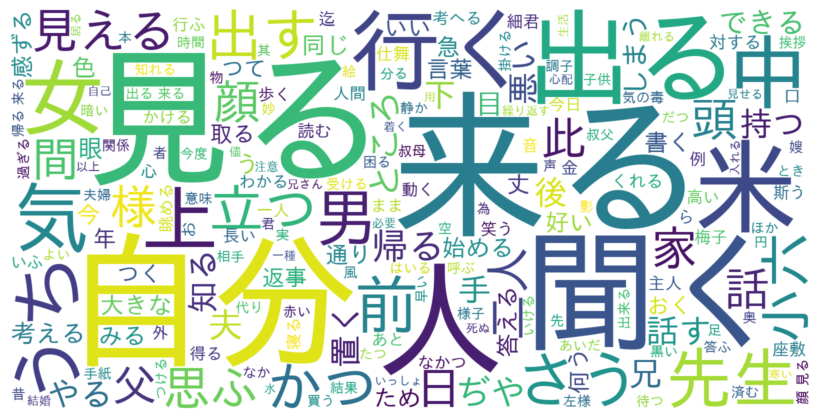

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ワードクラウドの表示設定と作成
wordcloud = WordCloud(
    width=1600, height=800,
    background_color="white", font_path=fpath
).generate(' '.join(words))

# プロット
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("wordcloud_exercise.png", dpi=300)
plt.show()

In [16]:
include_pos = ("NOUN", "VERB", "ADJ", "?????")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "ゐる", "云ふ", "言う", "つ", "御", "事", "時", "あり", "つう", "云う", "方", "所", "思う")

In [17]:
words = [token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords]

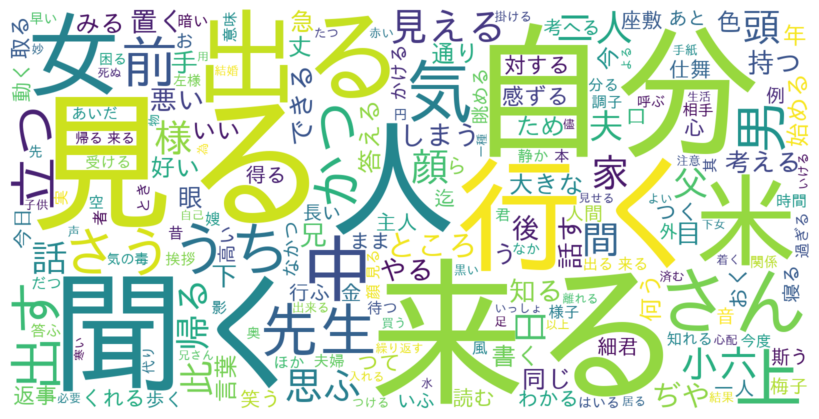

In [18]:
wordcloud = WordCloud(
    width=1600, height=800,
    background_color="white", font_path=fpath
).generate(' '.join(words))

# プロット
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 共起ネットワーク

In [19]:
# your code goes here
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
def extract_words(sent, pos_tags, stopwords):
    """
    分析対象の品詞であり、不要語ではない単語を抽出する
    """
    words = [token.lemma_ for token in sent if token.pos_ in pos_tags and token.lemma_ not in stopwords]
    return words

In [21]:
def count_cooccurrence(sents, token_length="{2,}"):
    """
    同じ文中に共起する単語を行列形式で列挙する
    """
    token_pattern = f"\\b\\w{token_length}\\b"
    count_model = CountVectorizer(token_pattern=token_pattern)

    X = count_model.fit_transform(sents)
    words = count_model.get_feature_names_out()
    word_counts = np.asarray(X.sum(axis=0)).reshape(-1)

    X[X > 0] = 1 # 同じ共起が2以上出現しても1とする
    Xc = (X.T * X) # 共起行列を求めるための掛け算をする、csr形式の疎行列

    return words, word_counts, Xc, X

In [22]:
def find_sentence_by_cooccurrence(X, idxs):
    """
    指定された共起を含む文を見つける
    """
    occur_flags = (X[:, idxs[0]] > 0)
    for idx in idxs[1:]:
        occur_flags = occur_flags.multiply(X[:, idx] > 0)

    return occur_flags.nonzero()[0]

In [23]:
# 文章を解析し、共起を求める
include_pos = ("NOUN", "VERB", "ADJ", "PROPN")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん", "ゐる", "云ふ", "言う", "つ", "御", "事", "時", "あり", "つう", "云う", "方", "所", "思う")

sents = []
with open(input_fn, "r") as f:
    for line in f:
        doc = nlp(line)
        tmp = [' '.join(extract_words(sent, include_pos, stopwords)) for sent in doc.sents]
        sents.extend(tmp)

words, word_counts, Xc, X = count_cooccurrence(sents)

In [24]:
counter = Counter()
for i, j in zip(*Xc.nonzero()):
    if i >= j:
        continue
    counter[(i, j)] += Xc[i, j]

# 共起の出現頻度top 20を出力する
for (i, j), c in counter.most_common(20):
    print(f"{c:>3d} ({words[i]}, {words[j]})")

127 (代助, 見る)
126 (出る, 来る)
120 (先生, 広田)
108 (帰る, 来る)
105 (三千代, 代助)
103 (三四郎, 見る)
 95 (かつ, 代助)
 94 (代助, 平岡)
 89 (代助, 来る)
 89 (来る, 見る)
 83 (代助, 自分)
 80 (宗助, 見る)
 76 (代助, 思ふ)
 75 (宗助, 来る)
 71 (三四郎, 美禰子)
 70 (自分, 見る)
 69 (代助, 聞く)
 69 (持つ, 来る)
 67 (三四郎, 与次郎)
 67 (来る, 行く)


In [25]:
sents_orig = []
with open(input_fn, "r") as f:
    for line in f:
        doc = nlp(line)
        tmp = list(doc.sents)
        sents_orig.extend(tmp)

# すべての単語の通し番号を求める
words_lookup = { word: index for index, word in enumerate(words) }

In [27]:
# 共起語を指定する
lookup_words = [["野々宮", "美禰子"], ["代助", "三千代"], ["宗助", "安井"]]


# 指定した共起語のインデックスを求める
idxs_list = [list(map(lambda x: words_lookup[x], pair)) for pair in lookup_words]

# 指定した共起を含む文のリストを出力する
for idxs in idxs_list:
    for i in find_sentence_by_cooccurrence(X, idxs):
        print(f"{i:>5d}: {sents_orig[i]}")

 3001: その影が折戸の外へ隠れると、美禰子は急に思い出したように「そうそう」と言いながら、庭先に脱いであった下駄をはいて、野々宮のあとを追いかけた。
 3237: 話は野々宮と美禰子のあいだに起こりつつある。
 3303: 歩きながら考えると、いまさき庭のうちで、野々宮と美禰子が話していた談柄が近因である。
 4395: 野々宮さんの妹といっしょに美禰子もいるだろう。
 4691: 　三四郎はその時はじめて美禰子から野々宮のおっかさんが国へ帰ったということを聞いた。
 4692: おっかさんが帰ると同時に、大久保を引き払って、野々宮さんは下宿をする、よし子は当分美禰子の家から学校へ通うことに、相談がきまったんだそうである。
 4700: 絶えず往来しているうちには野々宮さんと美禰子との関係も次第次第に移ってくる。
 4729: 美禰子の野々宮に対する賛辞のつづきは、ざっとこうである。
 4738: 自分が、野々宮に対するほどな尊敬を美禰子から受けえないのは当然である。
 4859: 美禰子のそばに野々宮さんを置くとなお苦しんでくる。
 4861: だから先生の所へ来ると、野々宮さんと美禰子との関係がおのずから明瞭になってくるだろうと思う。
 5881: 美禰子は呼ばれた原口よりは、原口より遠くの野々宮を見た。
 6634: 　三四郎は美禰子からもれて、よし子に伝わって、それが野々宮さんに知れているんだと判じた。
 8172: 野々宮さんが立つとともに、美禰子のうしろにいたよし子の姿も見えた。
10182: 代助は平岡に分れてから又引き返して、旅宿へ行つて、三千代さんに逢つて話しをしやうかと思つた。
10236: 是は三千代が直に代助に話した所である。
10237: 代助は其時三千代の顔を見て、矢っ張り何か心配の為ぢやないかしらと思つた。
10242: 三千代が細君にならない前、代助はよく、三千代の斯う云ふ眼遣を見た。
10270: 戯半分に、あなたは何か叱られて、顔を赤くしてゐましたね、どんな悪い事をしたんですか位言ひかねない間柄なのであるが、代助には三千代の愛嬌が、後から其場を取り繕ふ様に、いたましく聞えたので、冗談を云ひ募る元気も一寸出なかつた。
10283: 　代助は両手を頭の後へ持つて行つて、指と指を組み合せて三千代を見た。
10320: 　疳の鋭どい

In [28]:
!pip install networkx pyvis japanize_matplotlib

In [29]:
import networkx as nx
from pyvis.network import Network
import japanize_matplotlib

In [30]:
def word_weights(words, word_counts):
    """
    単語の最多頻度が1となるような相対値として単語の重みを求める
    """
    count_max = word_counts.max()
    weights = [(word, {"weight": count / count_max})
               for word, count in zip(words, word_counts)]
    return weights

In [31]:
def cooccurrence_weights(words, Xc, weight_cutoff):
    """
    共起の最多頻度が1となるような相対値として共起の重みを求める
    共起の重みがweight_cutoffより低い共起は除外する
    """
    Xc_max = Xc.max()
    cutoff = weight_cutoff * Xc_max
    weights = [(words[i], words[j], Xc[i, j] / Xc_max)
               for i, j in zip(*Xc.nonzero()) if i < j and Xc[i, j] > cutoff]
    return weights

In [32]:
def create_network(words, word_counts, Xc, weight_cutoff):
    """
    語、単語頻度、共起行列から共起ネットワークをNetworkX形式で得る
    """
    G = nx.Graph()

    weights_w = word_weights(words, word_counts)
    G.add_nodes_from(weights_w)

    weights_c = cooccurrence_weights(words, Xc, weight_cutoff)
    G.add_weighted_edges_from(weights_c)

    G.remove_nodes_from(list(nx.isolates(G)))
    return G

In [33]:
def pyplot_network(G):
    """
    NetworkX形式で与えられた共起ネットワークをpyplotで描画する
    """
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, k=0.1)

    weights_n = np.array(list(nx.get_node_attributes(G, "weight").values()))
    nx.draw_networkx_nodes(G, pos, node_size=300 * weights_n)
    weights_e = np.array(list(nx.get_edge_attributes(G, "weight").values()))
    nx.draw_networkx_edges(G, pos, width=20 * weights_e)

    nx.draw_networkx_labels(G, pos, font_family="IPAexGothic")

    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [34]:
def nx2pyvis_G(G):
    """
    NetworkX形式で与えられた共起ネットワークをpyvisで描画する
    """
    pyvis_G = Network(width="800px", height="800px", notebook=True)
    for node, attrs in G.nodes(data=True):
        pyvis_G.add_node(node, title=node, size=30 * attrs["weight"])
    for node1, node2, attrs in G.edges(data=True):
        pyvis_G.add_edge(node1, node2, width=20 * attrs["weight"])

    return pyvis_G

In [35]:
G = create_network(words, word_counts, Xc, 0.01)

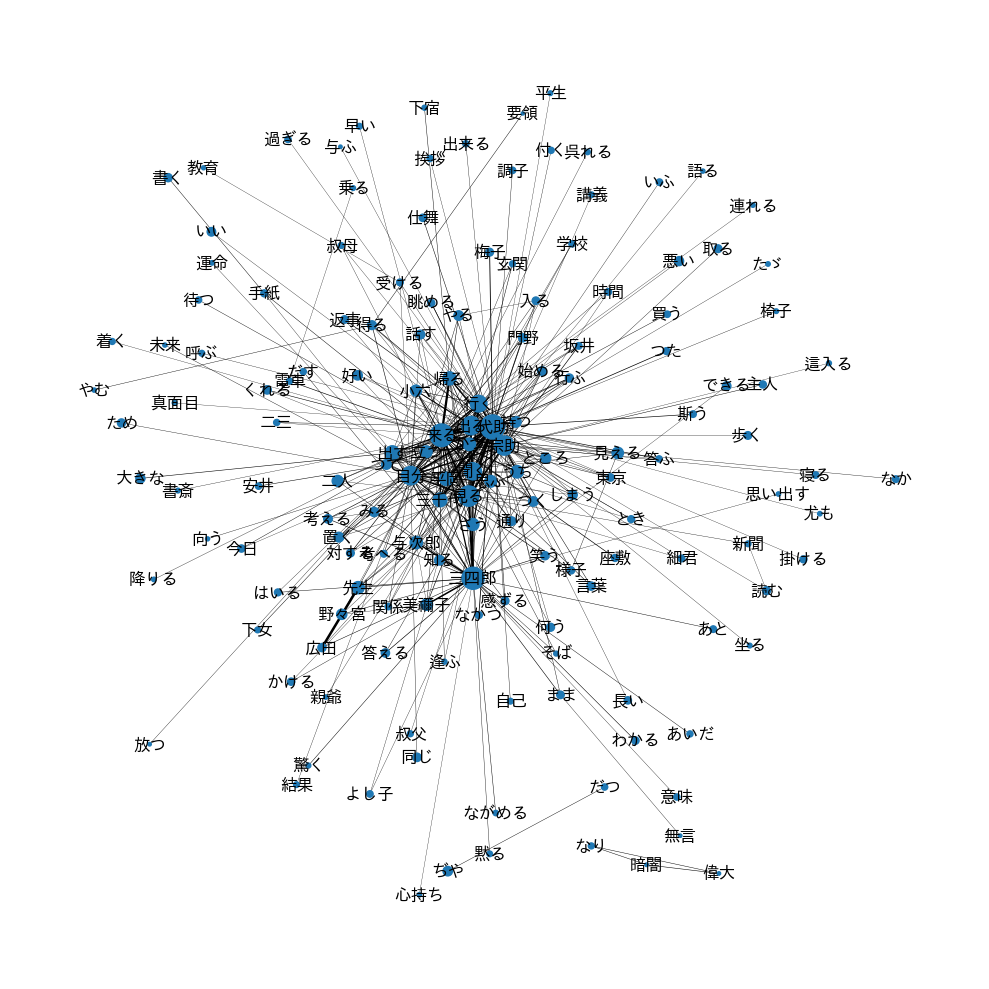

In [36]:
pyplot_network(G)

In [37]:
pyvis_G = nx2pyvis_G(G)
pyvis_G.show_buttons()
pyvis_G.show("network_exercise.html")

network_exercise.html


## 共起ヒートマップ

In [46]:
# your code goes here
include_pos = ("NOUN", "PROPN")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん", "ゐる", "云ふ", "言う", "つ", "御", "事", "時", "あり", "つう", "云う", "方", "所", "思う")

sents = []
with open(input_fn, "r") as f:
    for line in f:
        doc = nlp(line)
        tmp = [' '.join(extract_words(sent, include_pos, stopwords)) for sent in doc.sents]
        sents.extend(tmp)

words, word_counts, Xc, X = count_cooccurrence(sents)

In [47]:
# 共起行列Xcは疎行列なので、非ゼロ要素のみをカウンタに格納する
counter = Counter()
for i, j in zip(*Xc.nonzero()):
    if i >= j:
        continue
    counter[(i, j)] += Xc[i, j]

# 共起の出現頻度top 20を出力する
for (i, j), c in counter.most_common(20):
    print(f"{c:>3d} ({words[i]}, {words[j]})")

120 (先生, 広田)
105 (三千代, 代助)
 94 (代助, 平岡)
 81 (代助, 自分)
 71 (三四郎, 美禰子)
 67 (三四郎, 与次郎)
 62 (宗助, 自分)
 49 (三千代, 平岡)
 43 (三千代, 自分)
 42 (宗助, 小六)
 40 (代助, 梅子)
 39 (三四郎, 自分)
 38 (代助, 門野)
 35 (平岡, 自分)
 33 (うち, 代助)
 31 (つた, 代助)
 31 (坂井, 宗助)
 28 (つて, 代助)
 28 (代助, 返事)
 27 (まま, 三四郎)


In [48]:
columns = set(Xc.nonzero()[0])
columns_text = [words[i] for i in columns]

In [49]:
import pandas as pd

df = pd.DataFrame(np.zeros((len(columns), len(columns))), index=columns_text, columns=columns_text)

In [50]:
for cord, count in counter.items():
    df.iloc[cord] = count

In [56]:
characters = ["三四郎", "広田", "野々宮", "佐々木", "与次郎", "美禰子", "先生", "原口", "里見", "宗助", "小六", "安井", "坂井", "代助", "平岡", "三千代"]
df_characters = df[characters].filter(items=characters, axis=0)

In [57]:
!pip install plotly kaleido

In [58]:
import plotly.express as px

fig = px.imshow(df_characters, color_continuous_scale=px.colors.sequential.Oranges,
                title="前期三部作の登場人物", width=800, height=800)
fig.update_layout(font=dict(size=16))
fig.show()
fig.write_image("heatmap_exercise.png", scale=2)